# Tutorial/Assignment 1:

In [1]:
# Helper function for indexing. 
# Run this cell, but don't worry about understanding how it works for the purpose of this tutorial.

import matplotlib.pyplot as plt
import matplotlib.patches as mpatch

def plot_fancy_index(arr, indexed, fontsize=20):
    # arr is the original array
    # indexed is the indexed array that will be highlighted
    try:
        iter(indexed)
    except TypeError:
        indexed = [indexed]

    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()    
    shape = arr.shape
    for v in np.nditer(arr):
        # Draw the rectangles
        y, x = -(v//shape[0]), v%shape[0]
        if v in indexed:
            # If it is in indexed highlight it in color C1
            ax.add_artist(mpatch.Rectangle((x, y), 1, -1, fc='C1', ec='k'))
        else:
            ax.add_artist(mpatch.Rectangle((x, y), 1, -1, ec='k'))
        ax.annotate(f'{v}\n{(-y, x)}', (x + 0.5, y - 0.5), color='w', weight='bold', 
                    fontsize=fontsize, ha='center', va='center')

    ax.set_xlim((0, shape[0]))
    ax.set_xticks(np.arange(shape[0]))
    ax.set_xticklabels(range(shape[0]), fontsize=16)
    ax.set_xlabel(r'Axis 1 $\rightarrow$', fontsize=20)
    
    ax.set_ylim((-shape[1], 0))
    ax.set_yticks(-np.arange(shape[1]))
    ax.set_yticklabels(range(shape[1]), fontsize=16)
    ax.set_ylabel(r'$\leftarrow$ Axis 0', fontsize=20)
    
    # Remove tick marks from left and bottom axes
    ax.tick_params(axis='both', which='both',length=0)
    
    # Top axis
    ax2 = plt.twiny()
    ax2.set_xticks(range(1, shape[0]+1))
    ax2.set_xticklabels(-np.array(list(reversed(range(1, shape[0]+1)))), fontsize=16)
    ax2.tick_params(axis='both', which='both',length=0)
    
    # Right axis
    ax3 = plt.twinx()
    ax3.set_yticks(range(shape[1]))
    ax3.set_yticklabels(-np.array(list(reversed(range(1, shape[1]+1)))), fontsize=16)
    ax3.set_ylim(0, shape[1])
    ax3.tick_params(axis='both', which='both',length=0)

    plt.show()

## Load the numpy library

Remember to alias it with a recognizable name.

In [2]:
import numpy as np

## Load data using genfromtxt

Using the numpy documentation https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
find a way to split the data into x and y components without using an intermediate step.

In [3]:
# This is the way it was shown in the lecture. 
data = np.genfromtxt('AtmWtAgt.csv', delimiter=',', skip_header=1)
x, y = data[:,0], data[:,1]
x, y

(array([107.8681568, 107.8681465, 107.8681572, 107.8681785, 107.8681446,
        107.8681903, 107.8681526, 107.8681494, 107.8681616, 107.8681587,
        107.8681519, 107.8681486, 107.8681419, 107.8681569, 107.8681508,
        107.8681672, 107.8681385, 107.8681518, 107.8681662, 107.8681424,
        107.868136 , 107.8681333, 107.868161 , 107.8681477]),
 array([107.8681079, 107.8681344, 107.8681513, 107.8681197, 107.8681604,
        107.8681385, 107.8681642, 107.8681365, 107.8681151, 107.8681082,
        107.8681517, 107.8681448, 107.8681198, 107.8681482, 107.8681334,
        107.8681609, 107.8681101, 107.8681512, 107.8681469, 107.868136 ,
        107.8681254, 107.8681261, 107.868145 , 107.8681368]))

In [4]:
# Better way to do it
x, y = np.genfromtxt('AtmWtAgt.csv', delimiter=',', skip_header=1, unpack=True)
x, y

(array([107.8681568, 107.8681465, 107.8681572, 107.8681785, 107.8681446,
        107.8681903, 107.8681526, 107.8681494, 107.8681616, 107.8681587,
        107.8681519, 107.8681486, 107.8681419, 107.8681569, 107.8681508,
        107.8681672, 107.8681385, 107.8681518, 107.8681662, 107.8681424,
        107.868136 , 107.8681333, 107.868161 , 107.8681477]),
 array([107.8681079, 107.8681344, 107.8681513, 107.8681197, 107.8681604,
        107.8681385, 107.8681642, 107.8681365, 107.8681151, 107.8681082,
        107.8681517, 107.8681448, 107.8681198, 107.8681482, 107.8681334,
        107.8681609, 107.8681101, 107.8681512, 107.8681469, 107.868136 ,
        107.8681254, 107.8681261, 107.868145 , 107.8681368]))

## Statistics

Print the mean and sample standard deviation of both arrays. Be careful to read the documentation for `std` to understand which standard deviation it is calculating, and whether or not you have to include an extra keyword parameter.

- https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html#numpy.mean

In [5]:
print(np.mean(x), np.mean(y))
print(np.std(x, ddof=1), np.std(y, ddof=1))

107.86815376666668 107.86813635416665
1.3063113240455961e-05 1.6901684484534085e-05


Write your own mean function using the `sum` function and the `shape` of the array.

In [6]:
def mean(arr):
    return np.sum(arr)/arr.shape[0]

Check that it matches the output of the NumPy `mean` function.

In [7]:
print(mean(x), np.mean(x))

107.86815376666668 107.86815376666668


## Merging arrays

Combine the x and y arrays from the previous steps into one data array using the `hstack` function:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html#numpy.hstack

In [8]:
np.hstack((x, y))

array([107.8681568, 107.8681465, 107.8681572, 107.8681785, 107.8681446,
       107.8681903, 107.8681526, 107.8681494, 107.8681616, 107.8681587,
       107.8681519, 107.8681486, 107.8681419, 107.8681569, 107.8681508,
       107.8681672, 107.8681385, 107.8681518, 107.8681662, 107.8681424,
       107.868136 , 107.8681333, 107.868161 , 107.8681477, 107.8681079,
       107.8681344, 107.8681513, 107.8681197, 107.8681604, 107.8681385,
       107.8681642, 107.8681365, 107.8681151, 107.8681082, 107.8681517,
       107.8681448, 107.8681198, 107.8681482, 107.8681334, 107.8681609,
       107.8681101, 107.8681512, 107.8681469, 107.868136 , 107.8681254,
       107.8681261, 107.868145 , 107.8681368])

Now try it with the `vstack` function:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html#numpy.vstack

In [9]:
data = np.vstack((x, y))

With the newly merged array, turn it back into a dataset which has x, y as columns, instead of rows.

In [10]:
data = data.T
data

array([[107.8681568, 107.8681079],
       [107.8681465, 107.8681344],
       [107.8681572, 107.8681513],
       [107.8681785, 107.8681197],
       [107.8681446, 107.8681604],
       [107.8681903, 107.8681385],
       [107.8681526, 107.8681642],
       [107.8681494, 107.8681365],
       [107.8681616, 107.8681151],
       [107.8681587, 107.8681082],
       [107.8681519, 107.8681517],
       [107.8681486, 107.8681448],
       [107.8681419, 107.8681198],
       [107.8681569, 107.8681482],
       [107.8681508, 107.8681334],
       [107.8681672, 107.8681609],
       [107.8681385, 107.8681101],
       [107.8681518, 107.8681512],
       [107.8681662, 107.8681469],
       [107.8681424, 107.868136 ],
       [107.868136 , 107.8681254],
       [107.8681333, 107.8681261],
       [107.868161 , 107.868145 ],
       [107.8681477, 107.8681368]])

Print the number of dimensions, shape, number of elements, and data type for this new array.

In [11]:
print('Dimensions:', data.ndim)
print('Shape:', data.shape)
print('Size:', data.size)
print('Type:', data.dtype)

Dimensions: 2
Shape: (24, 2)
Size: 48
Type: float64


## Broadcasting

With the newly merged data multiply the x column by 10 and the y column by 20 using broadcasting, and store that in a new variable.

In [12]:
d1 = data*np.array([10, 20])
d1

array([[1078.681568, 2157.362158],
       [1078.681465, 2157.362688],
       [1078.681572, 2157.363026],
       [1078.681785, 2157.362394],
       [1078.681446, 2157.363208],
       [1078.681903, 2157.36277 ],
       [1078.681526, 2157.363284],
       [1078.681494, 2157.36273 ],
       [1078.681616, 2157.362302],
       [1078.681587, 2157.362164],
       [1078.681519, 2157.363034],
       [1078.681486, 2157.362896],
       [1078.681419, 2157.362396],
       [1078.681569, 2157.362964],
       [1078.681508, 2157.362668],
       [1078.681672, 2157.363218],
       [1078.681385, 2157.362202],
       [1078.681518, 2157.363024],
       [1078.681662, 2157.362938],
       [1078.681424, 2157.36272 ],
       [1078.68136 , 2157.362508],
       [1078.681333, 2157.362522],
       [1078.68161 , 2157.3629  ],
       [1078.681477, 2157.362736]])

Using the new array, take every third element of the second column (y) and set it to zero.

In [13]:
d1[::3,1] = 0

Print the new array to confirm that the operation worked correctly.

In [14]:
d1

array([[1078.681568,    0.      ],
       [1078.681465, 2157.362688],
       [1078.681572, 2157.363026],
       [1078.681785,    0.      ],
       [1078.681446, 2157.363208],
       [1078.681903, 2157.36277 ],
       [1078.681526,    0.      ],
       [1078.681494, 2157.36273 ],
       [1078.681616, 2157.362302],
       [1078.681587,    0.      ],
       [1078.681519, 2157.363034],
       [1078.681486, 2157.362896],
       [1078.681419,    0.      ],
       [1078.681569, 2157.362964],
       [1078.681508, 2157.362668],
       [1078.681672,    0.      ],
       [1078.681385, 2157.362202],
       [1078.681518, 2157.363024],
       [1078.681662,    0.      ],
       [1078.681424, 2157.36272 ],
       [1078.68136 , 2157.362508],
       [1078.681333,    0.      ],
       [1078.68161 , 2157.3629  ],
       [1078.681477, 2157.362736]])

## Finding specific elements

Use `argmax` to find the index of the smallest element in each row (either in x or y): https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html#numpy.argmax

In [15]:
argmax = np.argmax(d1, axis=1)
argmax

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1])

Use the array returned by argmin to print the elements from the new array. You will need to use a for loop.

In [16]:
for row in range(len(d1)):
    print(d1[row][argmax[row]])

1078.681568
2157.362688
2157.363026
1078.681785
2157.3632079999998
2157.36277
1078.681526
2157.3627300000003
2157.362302
1078.681587
2157.363034
2157.362896
1078.681419
2157.362964
2157.362668
1078.681672
2157.362202
2157.363024
1078.681662
2157.36272
2157.362508
1078.681333
2157.3629
2157.362736


## Modifying values based on condition

Before continuing, save a copy of the data in a new variable: https://docs.scipy.org/doc/numpy/reference/generated/numpy.copy.html

In [17]:
d2 = d1.copy()

For the data in the first column (d[:,0]) use the `where` function to set all values that are below the mean of that column to the negative of their value.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

In [18]:
d2[:,0] = np.where(d1[:,0] < d1[:,0].mean(), -d1[:,0], d1[:,0])

Print the result and convince yourself it is correct by comparing to the original array and the value of the mean.

In [19]:
d2

array([[ 1078.681568,     0.      ],
       [-1078.681465,  2157.362688],
       [ 1078.681572,  2157.363026],
       [ 1078.681785,     0.      ],
       [-1078.681446,  2157.363208],
       [ 1078.681903,  2157.36277 ],
       [-1078.681526,     0.      ],
       [-1078.681494,  2157.36273 ],
       [ 1078.681616,  2157.362302],
       [ 1078.681587,     0.      ],
       [-1078.681519,  2157.363034],
       [-1078.681486,  2157.362896],
       [-1078.681419,     0.      ],
       [ 1078.681569,  2157.362964],
       [-1078.681508,  2157.362668],
       [ 1078.681672,     0.      ],
       [-1078.681385,  2157.362202],
       [-1078.681518,  2157.363024],
       [ 1078.681662,     0.      ],
       [-1078.681424,  2157.36272 ],
       [-1078.68136 ,  2157.362508],
       [-1078.681333,     0.      ],
       [ 1078.68161 ,  2157.3629  ],
       [-1078.681477,  2157.362736]])

## Copy vs view (optional)

There is a subtlety in the way that NumPy does the indexing that can on rare occasions lead to seemingly odd behaviour. Read the documentation here to find out more: https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html

## Save the data

Save the new array (with the zeros) to a new file. Make sure to use a comma for the delimiter.

In [20]:
np.savetxt('d2_data.csv', d2, delimiter=',')

Load the file into a new array and print it to convince yourself that saving the file worked.

In [21]:
np.genfromtxt('d2_data.csv', delimiter=',')

array([[ 1078.681568,     0.      ],
       [-1078.681465,  2157.362688],
       [ 1078.681572,  2157.363026],
       [ 1078.681785,     0.      ],
       [-1078.681446,  2157.363208],
       [ 1078.681903,  2157.36277 ],
       [-1078.681526,     0.      ],
       [-1078.681494,  2157.36273 ],
       [ 1078.681616,  2157.362302],
       [ 1078.681587,     0.      ],
       [-1078.681519,  2157.363034],
       [-1078.681486,  2157.362896],
       [-1078.681419,     0.      ],
       [ 1078.681569,  2157.362964],
       [-1078.681508,  2157.362668],
       [ 1078.681672,     0.      ],
       [-1078.681385,  2157.362202],
       [-1078.681518,  2157.363024],
       [ 1078.681662,     0.      ],
       [-1078.681424,  2157.36272 ],
       [-1078.68136 ,  2157.362508],
       [-1078.681333,     0.      ],
       [ 1078.68161 ,  2157.3629  ],
       [-1078.681477,  2157.362736]])

## Linear algebra

The linear algebra functions for numpy are in the `linalg` module. To access it use

```
np.linalg.*
```

where the `*` represents the name of the function you want to use.

A full list of the functions can be found at https://docs.scipy.org/doc/numpy/reference/routines.linalg.html.

In [22]:
# Starting with the following matrix:
M = np.array([[2, 1, -1], [-3, -1, 2], [-2, 1, 2]])
M

array([[ 2,  1, -1],
       [-3, -1,  2],
       [-2,  1,  2]])

Take the inverse of the matrix and store it in a variable

In [23]:
m1 = np.linalg.inv(M)

Multiply the matrix by its inverse

In [24]:
m1@M

array([[ 1.00000000e+00,  6.66133815e-16, -1.33226763e-15],
       [-8.88178420e-16,  1.00000000e+00,  4.44089210e-16],
       [ 2.66453526e-15,  4.44089210e-16,  1.00000000e+00]])

Check that this is close to the identity matrix by using the identity creation function in numpy:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html

and the `allclose` function (remember that we should not compare floating point values directly):

https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html

In [25]:
np.allclose(np.eye(3), m1@M)

True

Get the eigenvalues and eigenvectors of the matrix, `M`, and store them in separate variables. Print the eigenvalues and eigenvectors.

In [26]:
vals, vects = np.linalg.eig(M)
print(vals)
print(vects)

[ 3.21431974  0.46081113 -0.67513087]
[[-0.22113623  0.58085736  0.46692616]
 [ 0.54213889 -0.08443477 -0.65511222]
 [ 0.81066898  0.80961441  0.59397638]]


## More indexing

First we create an array and reshape it (store the array in a variable called `array`). Note the use of the `-1` which allows NumPy to calculate the missing dimension for you. 

In [27]:
array = np.arange(64).reshape((-1,16))
array

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

Change the reshape command above to create an array with 16 rows.

In [28]:
array = np.arange(64).reshape((16, -1))
array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31],
       [32, 33, 34, 35],
       [36, 37, 38, 39],
       [40, 41, 42, 43],
       [44, 45, 46, 47],
       [48, 49, 50, 51],
       [52, 53, 54, 55],
       [56, 57, 58, 59],
       [60, 61, 62, 63]])

Change the reshape command to create a square matrix.

In [29]:
array = np.arange(64).reshape((8, -1))
array

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

Extract the diagonal from the array using the indexing methods described in the lecture. It might be helpful to use the `arange` and `array.shape` to help build the indexes automatically. The `plot_fancy_index` function has been set up to help visualize your efforts.

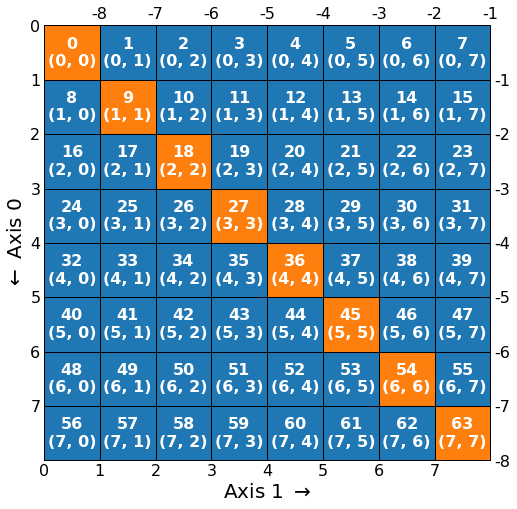

In [30]:
indexed = array[np.arange(array.shape[0]), np.arange(array.shape[1])]  # Change this line to see the effects
plot_fancy_index(array, indexed, fontsize=16)

Read about array masking and use this in combination with the NumPy `eye` function to get the diagonal elements from the array. You will have to specify the data type of the mask to be `bool`.

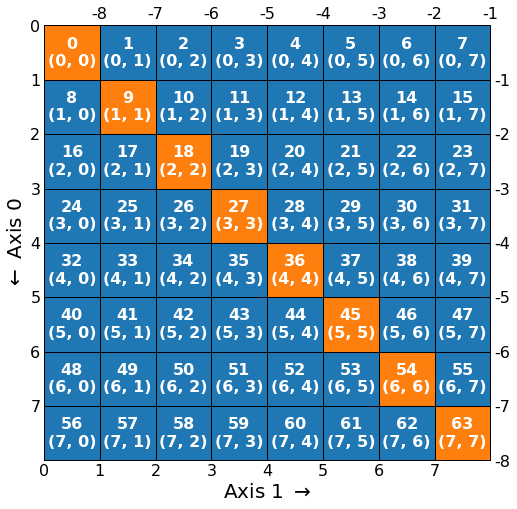

In [31]:
indexed = array[np.eye(array.shape[0], dtype=bool)]  # Change this line to see the effects
plot_fancy_index(array, indexed, fontsize=16)

**Hard Challenge**

Use array masking to extract only the elements where the value starts with a 3, or starts with a 4 and ends with a number larger than 6.

Hints:

- Transforming the array of integers into an array of strings would help get values starting with a particular number.

- You will need to look up `defchararray` functions such as: https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.core.defchararray.startswith.html#numpy.core.defchararray.startswith

- You will also need to look up the bitwise boolean operators: https://wiki.python.org/moin/BitwiseOperators

In [32]:
mask1 = np.core.defchararray.startswith(array.astype(str), '3')
mask1

array([[False, False, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

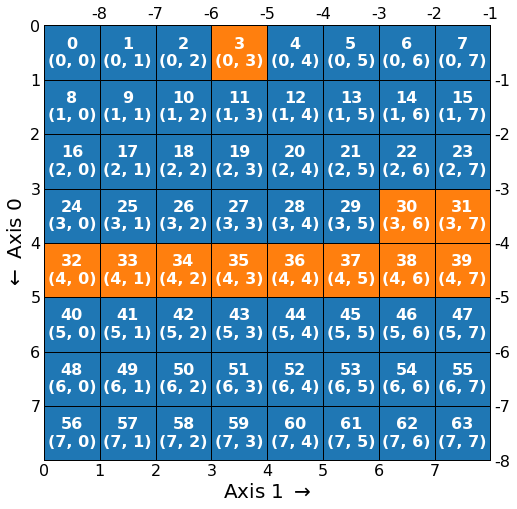

In [33]:
indexed = array[mask1]
plot_fancy_index(array, indexed, fontsize=16)

In [34]:
mask2 = np.core.defchararray.startswith(array.astype(str), '4')
mask2

array([[False, False, False, False,  True, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

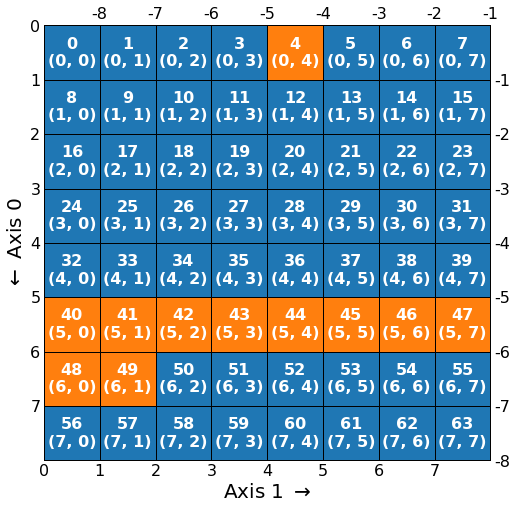

In [35]:
indexed = array[mask2]
plot_fancy_index(array, indexed, fontsize=16)

In [36]:
mask3 = array % 10 > 6
mask3

array([[False, False, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False],
       [False,  True,  True,  True, False, False, False, False],
       [False, False, False,  True,  True,  True, False, False],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False],
       [False,  True,  True,  True, False, False, False, False]])

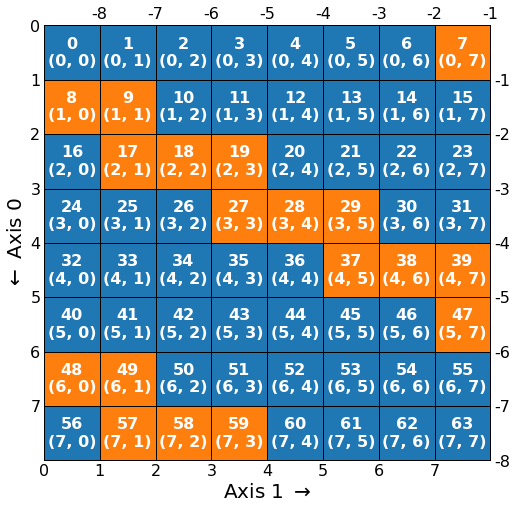

In [37]:
indexed = array[mask3]
plot_fancy_index(array, indexed, fontsize=16)

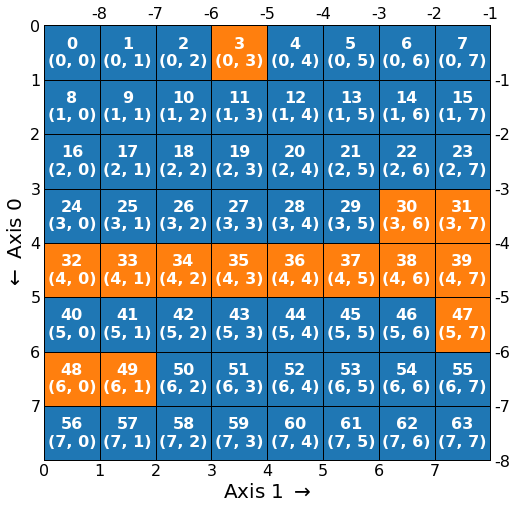

In [38]:
# Put it all together
indexed = array[mask1 | (mask2 & mask3)]
plot_fancy_index(array, indexed, fontsize=16)

## More array creation

Creating equally spaced arrays is often used when plotting. Look at the `linspace` command and create 21 equally spaced points between 0 and 10.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

In [39]:
np.linspace(0, 10, 21)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

Use the `logspace` function to create 90 equally spaced points (in log space) between 1e-6 and 1e3 excluding the endpoint, and reshape the array so it has each decade in a row.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html#numpy.logspace

In [40]:
np.logspace(-6, 3, 90, endpoint=False).reshape((-1, 10))

array([[1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
        2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
        6.30957344e-06, 7.94328235e-06],
       [1.00000000e-05, 1.25892541e-05, 1.58489319e-05, 1.99526231e-05,
        2.51188643e-05, 3.16227766e-05, 3.98107171e-05, 5.01187234e-05,
        6.30957344e-05, 7.94328235e-05],
       [1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
        2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
        6.30957344e-04, 7.94328235e-04],
       [1.00000000e-03, 1.25892541e-03, 1.58489319e-03, 1.99526231e-03,
        2.51188643e-03, 3.16227766e-03, 3.98107171e-03, 5.01187234e-03,
        6.30957344e-03, 7.94328235e-03],
       [1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
        2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
        6.30957344e-02, 7.94328235e-02],
       [1.00000000e-01, 1.25892541e-01, 1.58489319e-01, 1.99526231e-01,
   

## Extra reading (optional)

Numpy has some extra modules that can help with doing discrete fourier transforms and generating pseudo random numbers. The documentation is linked here in case you wish to explore these further.

- https://docs.scipy.org/doc/numpy/reference/routines.fft.html
- https://docs.scipy.org/doc/numpy/reference/routines.random.html